In [1]:
#Nancy Radwan 0195876 , Ghaidaa falah 0199959

import pandas as pd
from pathlib import Path
import numpy as np
import tarfile
import urllib.request

#read the CVD Dataset.csv file
data=pd.read_csv(Path("OP_1.csv"))

import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
# get the top five rows : .head()
data.head()
#so we have 40 coloumn 'Gender','Age','Height','Weight','BMI','L1-4','L1.4T','FN','FNT','TL','TLT','ALT','AST','BUN','CREA','URIC','FBG','HDL-C','LDL-C','Ca','P','Mg', 'Calsium', 'Calcitriol', 'Bisphosphonate', 'Calcitonin', 'HTN', 'COPD', 'DM', 'Hyperlipidaemia', 'Hyperuricemia', 'AS', 'VT', 'VD', 'OP', 'CAD', 'CKD','Fracture', 'Smoking', 'Drinking'

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No


In [3]:
# get the last five rows : .tail()
data.tail()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
1532,2,51.0,160.0,59.0,23.046875,0.941,-2.0,0.7755,-2.30,0.9135,...,No,No,No,No,No,No,No,No,Yes,Yes
1533,1,51.0,167.0,65.0,23.306680,1.048,-1.4,0.9755,-0.05,1.1630,...,No,Yes,No,No,No,Yes,No,No,No,No
1534,1,46.6,168.0,69.0,24.447279,1.411,1.6,0.9450,-0.95,1.0750,...,No,Yes,No,No,No,No,No,No,No,No
1535,1,55.0,175.0,70.0,22.857143,1.075,-1.2,1.0815,0.85,1.1705,...,No,No,No,No,No,No,No,No,No,No
1536,1,45.0,172.0,87.0,29.407788,1.409,1.6,0.8850,-1.45,0.9215,...,No,Yes,No,No,No,No,No,No,No,No


In [4]:
# get quick discription about the data : .info()
data.info() 
#number of coloumns = 40 
#Age      1537-1501 =  36
#Height   1537-1503 =  34
#Weight   1537-1503 =  34
#BMI      1537-1503 =  34
#ALT      1537-1535 =  2
#AST      1537-1535 =  2
#BUN      1537-1536 =  1
#CREA     1537-1534 =  3
#FBG      1537-1521 =  16
#HDL-C    1537-1520 =  17
#LDL-C    1537-1523 =  14
#Ca       1537-1535 =   2
#P        1537-1532 =   5
#Mg       1537-1534 =   3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1537 non-null   int64  
 1   Age              1501 non-null   float64
 2   Height           1503 non-null   float64
 3   Weight           1503 non-null   float64
 4   BMI              1503 non-null   float64
 5   L1-4             1537 non-null   float64
 6   L1.4T            1537 non-null   float64
 7   FN               1537 non-null   float64
 8   FNT              1537 non-null   float64
 9   TL               1537 non-null   float64
 10  TLT              1537 non-null   float64
 11  ALT              1535 non-null   float64
 12  AST              1535 non-null   float64
 13  BUN              1536 non-null   float64
 14  CREA             1534 non-null   float64
 15  URIC             1537 non-null   float64
 16  FBG              1521 non-null   float64
 17  HDL-C         

In [5]:
#checking  if there are missing values 
data.isnull().sum() 

Gender              0
Age                36
Height             34
Weight             34
BMI                34
L1-4                0
L1.4T               0
FN                  0
FNT                 0
TL                  0
TLT                 0
ALT                 2
AST                 2
BUN                 1
CREA                3
URIC                0
FBG                16
HDL-C              17
LDL-C              14
Ca                  2
P                   5
Mg                  3
Calsium             0
Calcitriol          0
Bisphosphonate      0
Calcitonin          0
HTN                 0
COPD                0
DM                  0
Hyperlipidaemia     0
Hyperuricemia       0
AS                  0
VT                  0
VD                  0
OP                  0
CAD                 0
CKD                 0
Fracture            0
Smoking             0
Drinking            0
dtype: int64

In [6]:
#show summery of the numerical attributes (count ,mean ,std ,min ,25% ,50% ,75%, max): .describe()
data.describe()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,AST,BUN,CREA,URIC,FBG,HDL-C,LDL-C,Ca,P,Mg
count,1537.000000,1501.000000,1503.000000,1503.000000,1503.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,...,1535.000000,1536.000000,1534.000000,1537.000000,1521.000000,1520.000000,1523.000000,1535.000000,1532.000000,1534.000000
mean,1.385166,59.852232,165.820692,67.151031,24.312817,1.136400,-0.551972,0.866763,-1.300755,0.934433,...,22.663192,5.616712,73.974459,348.106278,5.329744,1.249704,2.599022,2.237967,1.039543,0.868564
std,0.486793,12.940563,8.087217,11.991113,3.316477,0.187552,1.526073,0.145872,1.111612,0.153444,...,9.462300,3.315197,25.701490,96.829480,1.541453,0.378754,0.900320,0.160265,0.209025,0.095517
min,1.000000,28.600000,141.000000,23.000000,9.213267,0.763000,-3.500000,0.327500,-5.050000,0.308000,...,9.000000,1.740000,5.860000,5.460000,3.130000,0.450000,0.140000,1.780000,0.560000,0.097000
25%,1.000000,51.000000,160.000000,59.000000,22.066075,0.999000,-1.600000,0.768500,-2.050000,0.835000,...,17.000000,4.340000,60.000000,278.000000,4.580000,1.010000,1.920000,2.160000,0.920000,0.810000
50%,1.000000,57.000000,167.000000,67.000000,24.218750,1.124000,-0.700000,0.858500,-1.400000,0.926000,...,21.000000,5.180000,70.600000,339.300000,4.960000,1.190000,2.550000,2.230000,1.020000,0.870000
75%,2.000000,67.300000,172.000000,75.000000,26.356049,1.256000,0.400000,0.965000,-0.550000,1.035500,...,25.000000,6.200000,81.575000,408.800000,5.530000,1.440000,3.175000,2.310000,1.130000,0.930000
max,2.000000,99.800000,187.000000,113.000000,37.261470,1.936000,6.000000,1.419000,2.700000,1.456500,...,128.000000,69.800000,381.200000,745.300000,24.650000,5.460000,6.650000,5.840000,4.410000,1.730000


In [7]:
data["HTN"].value_counts()
# 

HTN
Yes    842
No     695
Name: count, dtype: int64

In [8]:
# get the unique values 
data["HTN"].describe()
# 

count     1537
unique       2
top        Yes
freq       842
Name: HTN, dtype: object

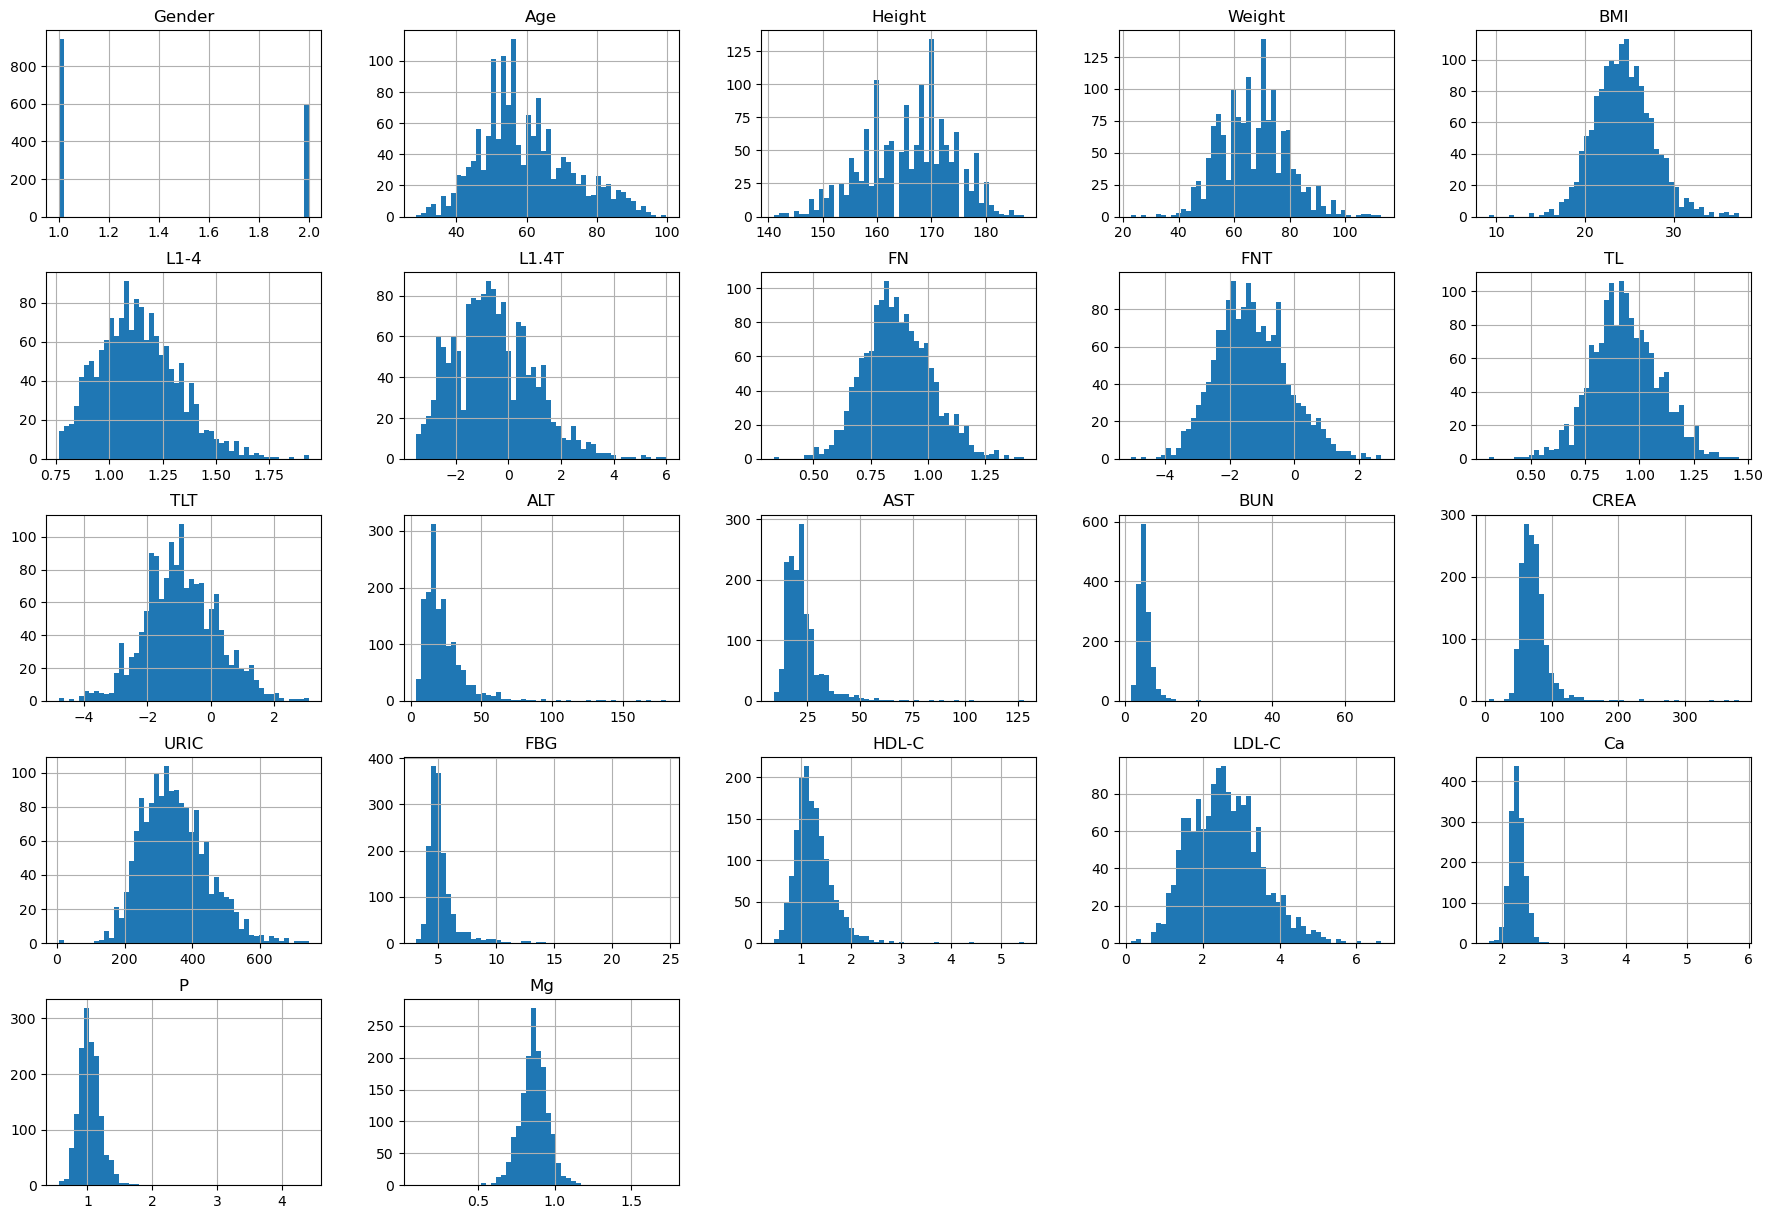

In [9]:
#to plot CVD Dataset as histogram : .hist() / just for numerical value 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(22,15))  
plt.show()

Note: you may need to restart the kernel to use updated packages.


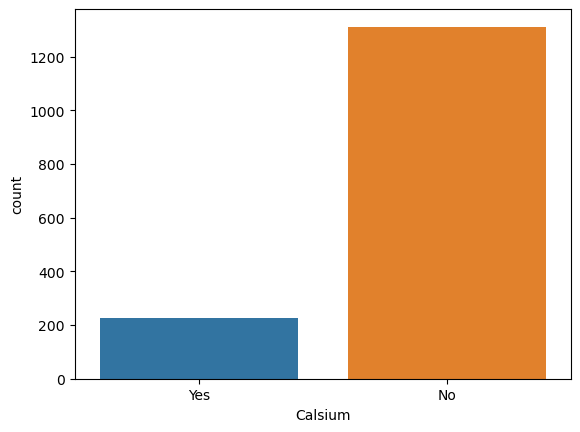

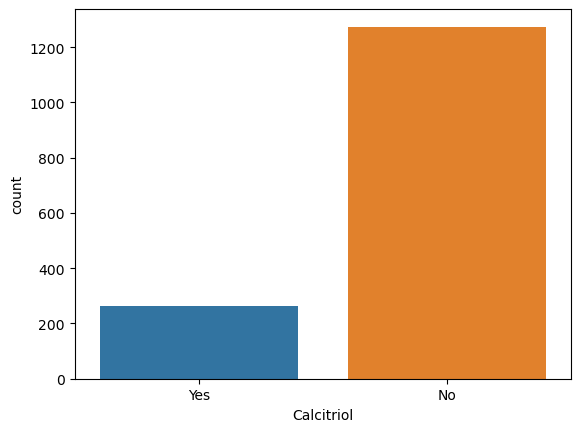

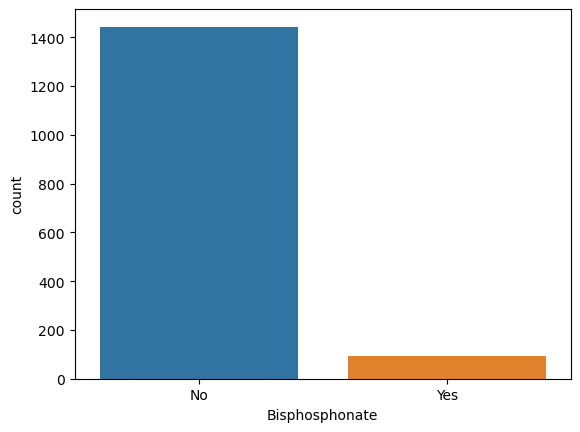

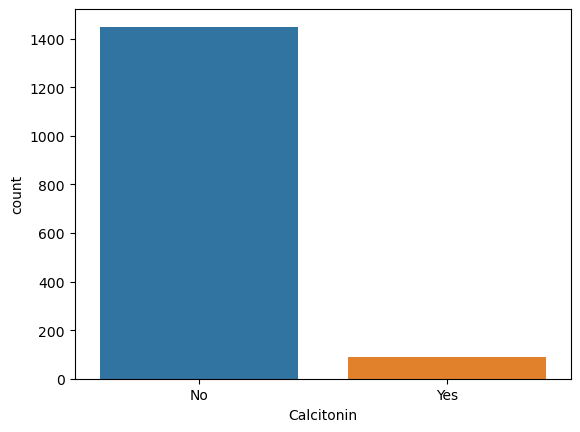

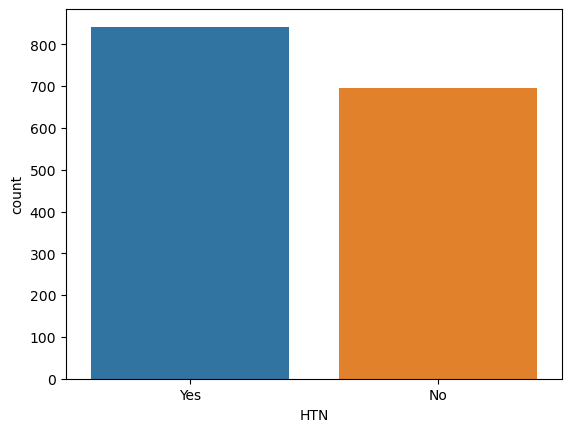

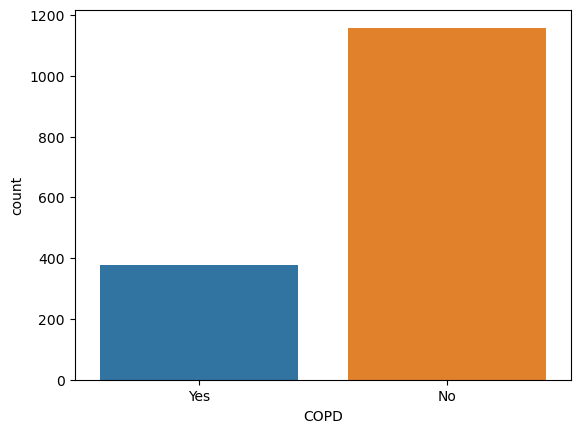

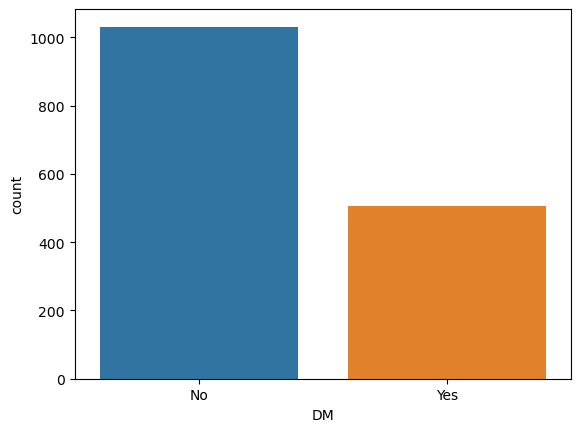

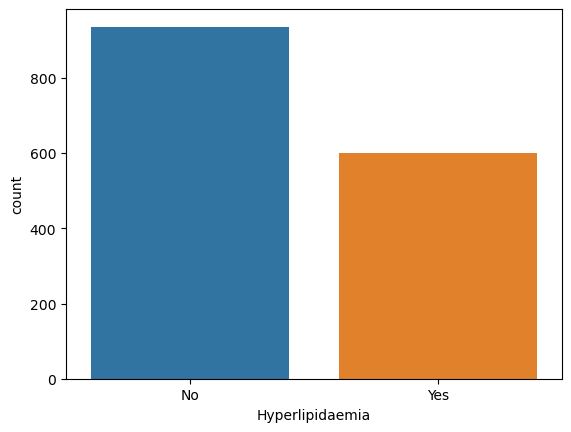

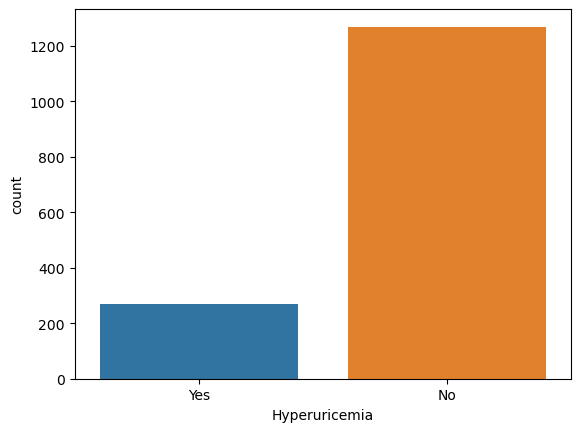

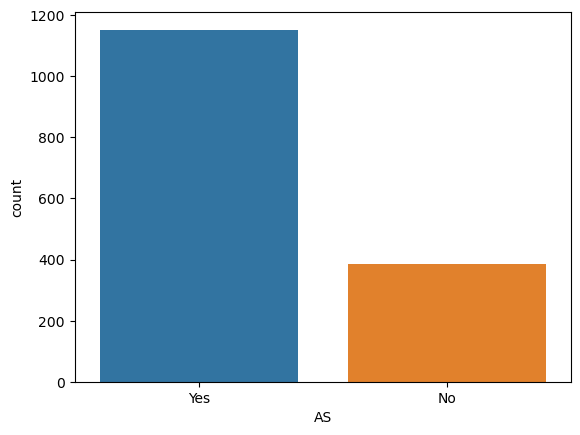

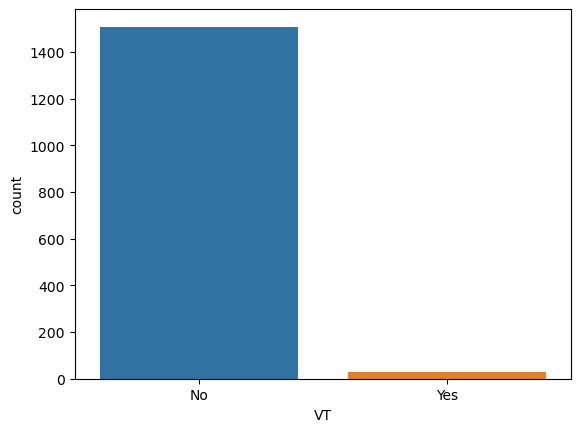

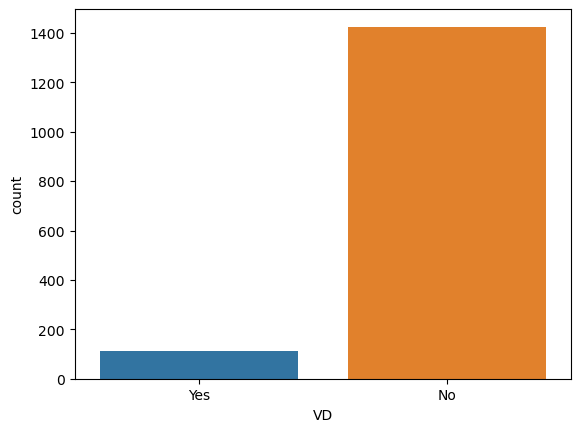

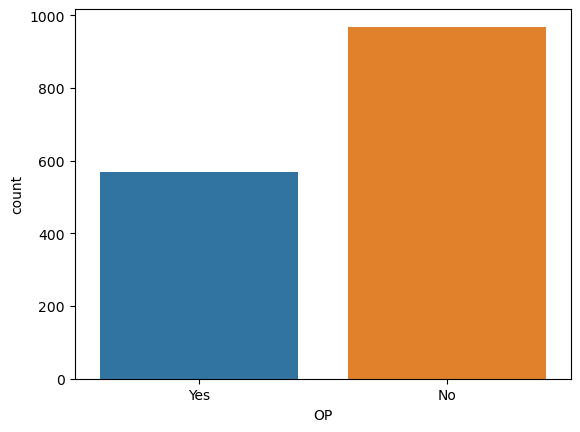

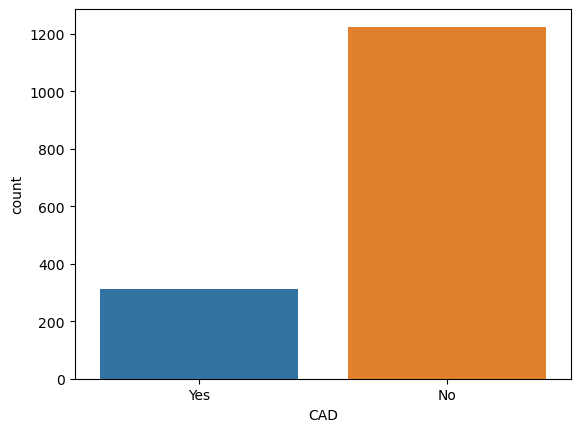

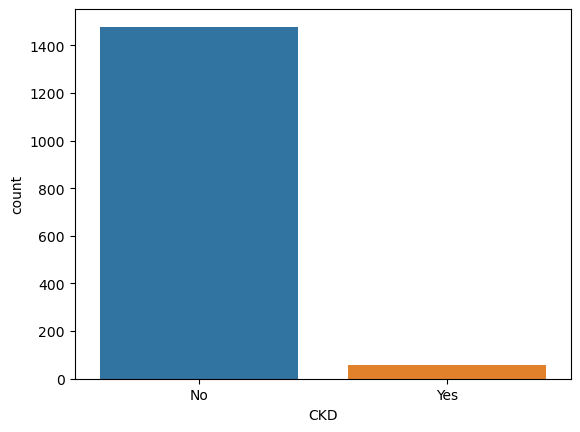

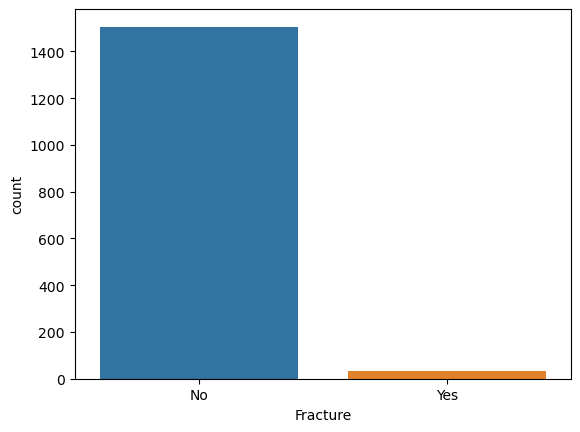

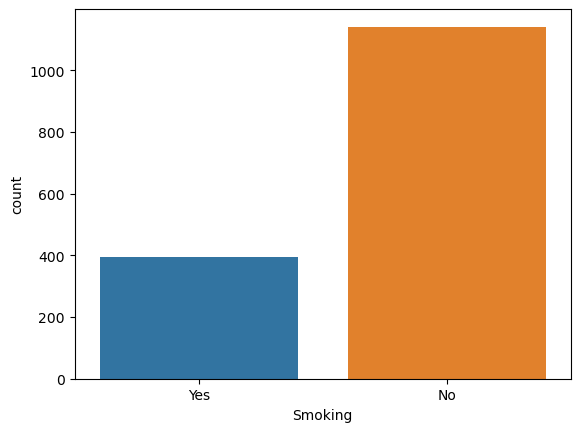

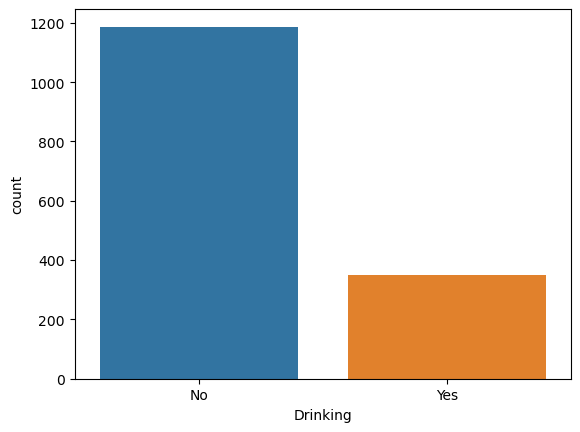

In [10]:
%pip install seaborn
import seaborn as sns
CVDobj = data.select_dtypes(include='object')

#sns.countplot
#even  data has a numeric or date type it will show the counts of observations in each categorical bin using bars.
for N in CVDobj.iloc[:, :].columns:
    ax=sns.countplot(x=N, data=CVDobj)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

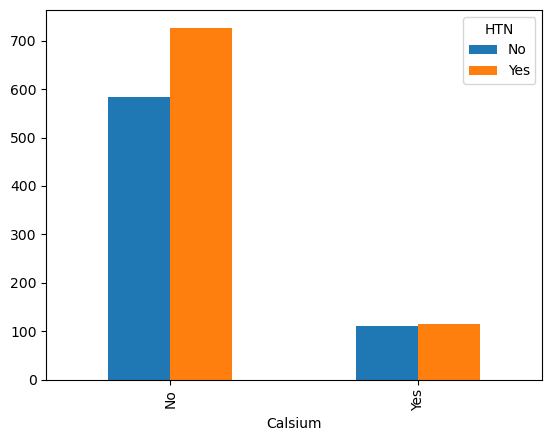

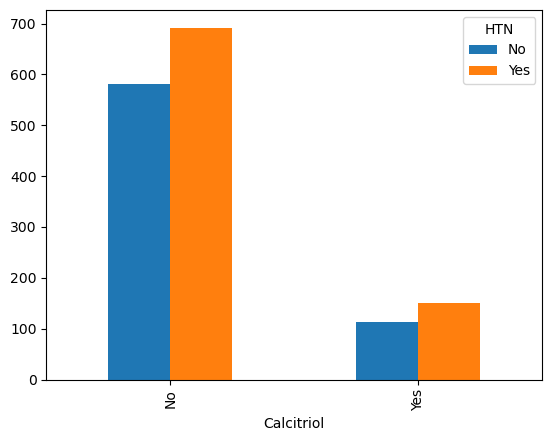

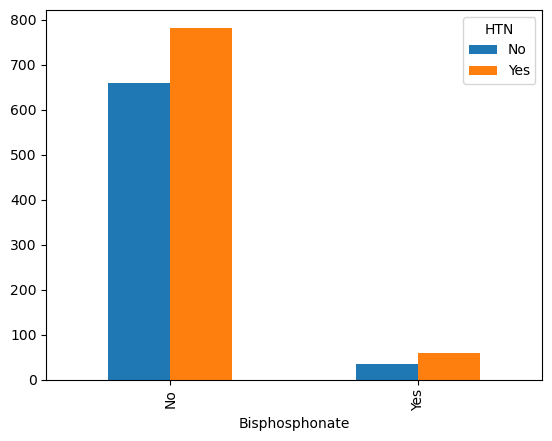

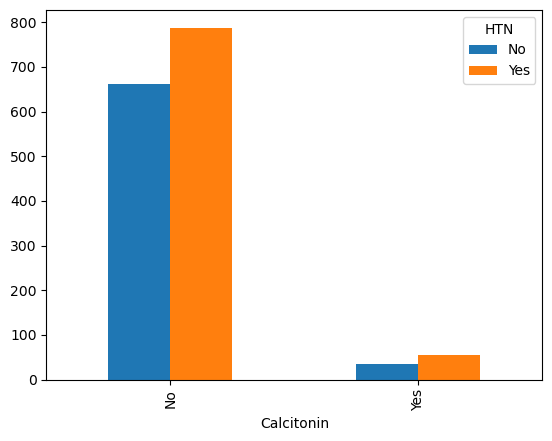

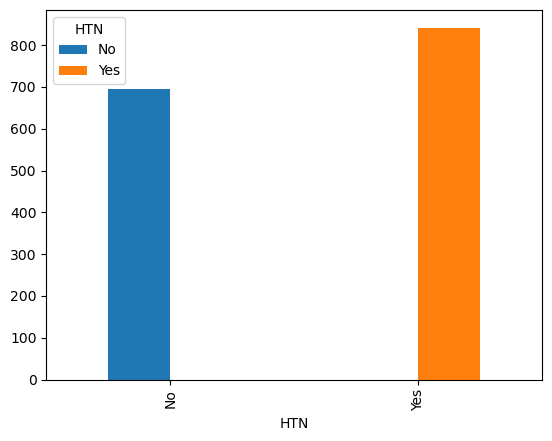

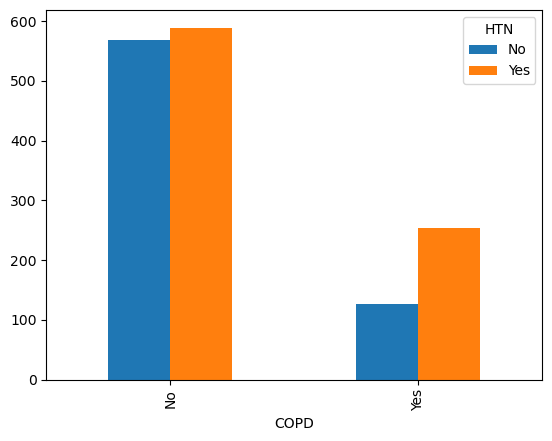

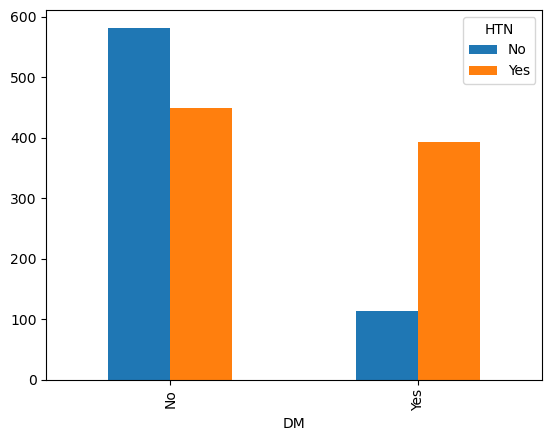

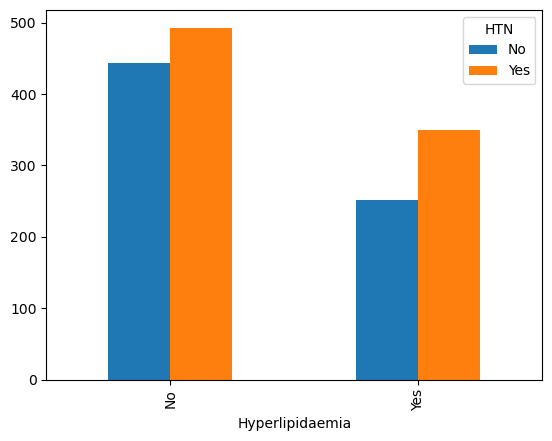

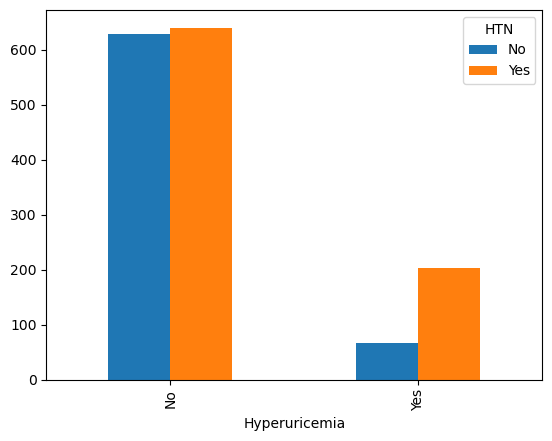

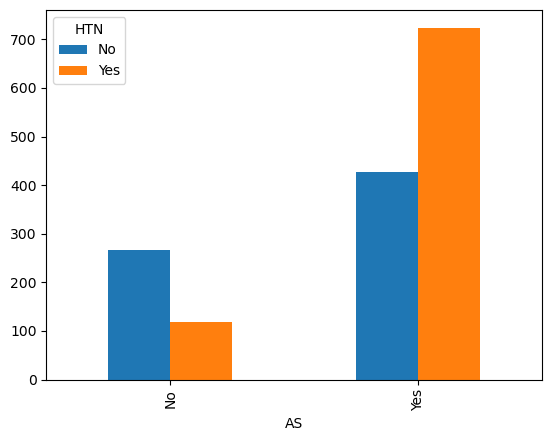

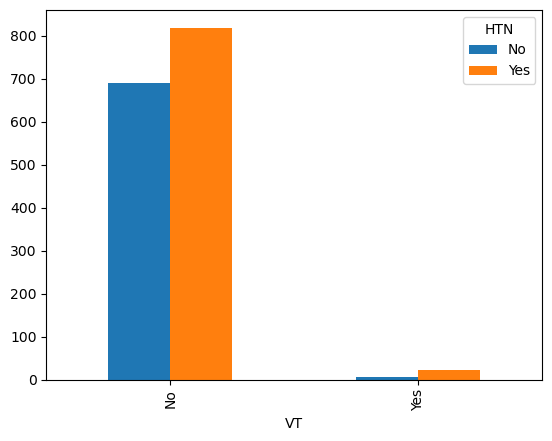

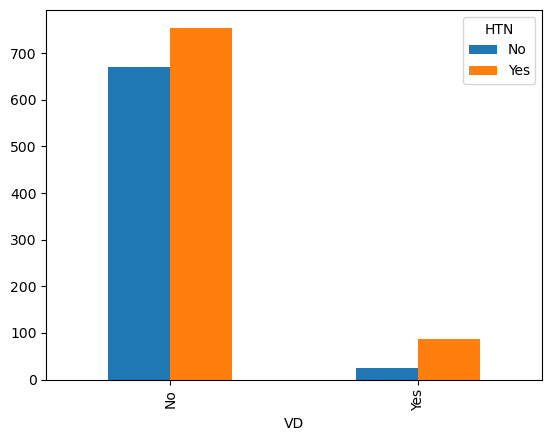

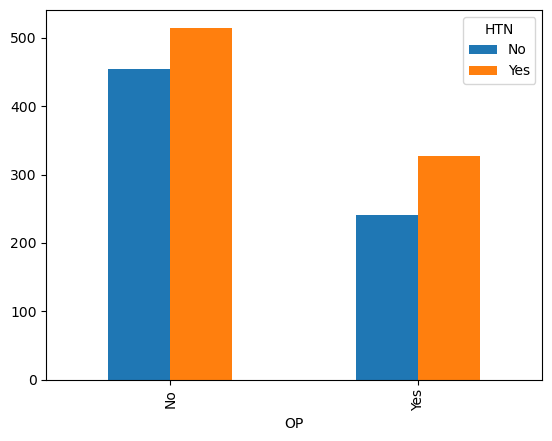

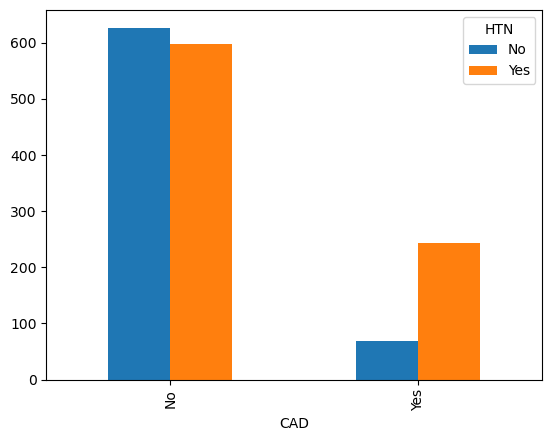

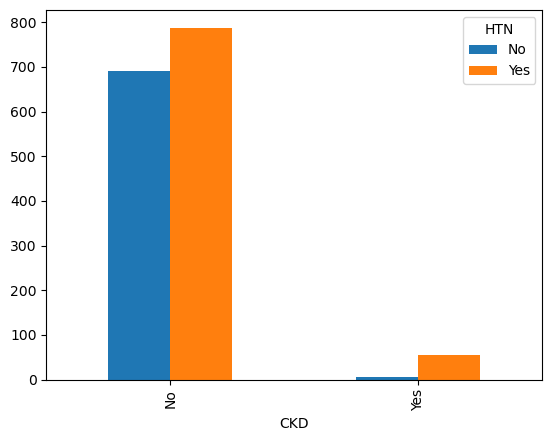

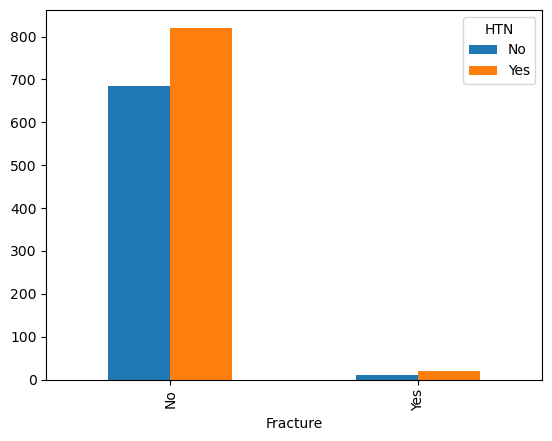

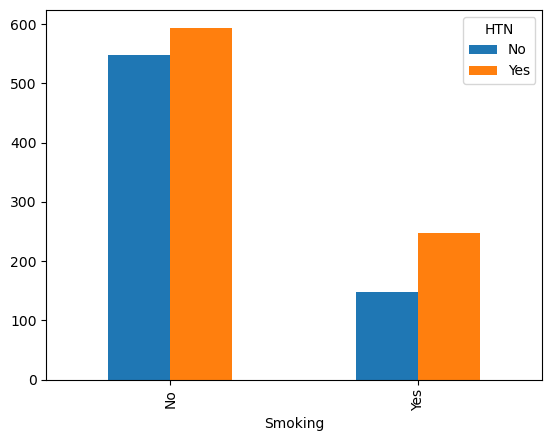

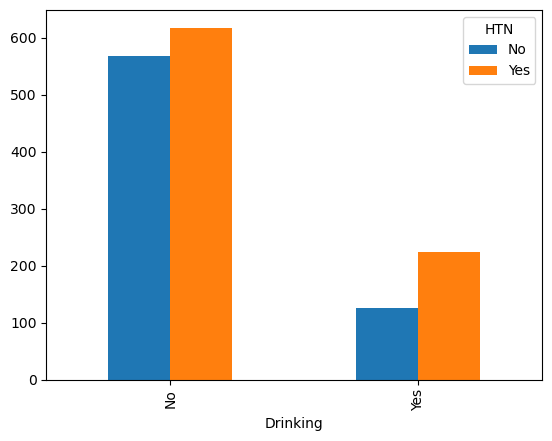

In [11]:
#show how each cat_features affect on Heart Disease
plt.figure(figsize=(20,10))
for i, col in enumerate(CVDobj):
    pd.crosstab(index=data[col], columns=data['HTN']).plot(kind='bar')

In [12]:
#imputer to fill null value in nmerical coloumn  with the median 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [13]:
data_num = data.select_dtypes(include=[np.number])
data_cat =  pd.DataFrame(data.select_dtypes(include='object'))

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

num_attribs = ['Gender','Age','Height','Weight','BMI','L1-4','L1.4T','FN','FNT','TL','TLT','ALT',
               'AST','BUN','CREA','URIC','FBG','HDL-C','LDL-C','Ca','P','Mg']
cat_attribs = ['Fracture', 'Smoking', 'Drinking', 'Calsium', 'Calcitriol', 'Bisphosphonate', 'Calcitonin', 
               'HTN', 'COPD', 'DM', 'Hyperlipidaemia', 'Hyperuricemia', 'AS', 'VT', 'VD', 'OP', 'CAD', 'CKD']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

cat_pipeline = make_pipeline(
    OrdinalEncoder()
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [15]:
data_prep = preprocessing.fit_transform(data)
data_prep 

array([[ 1.26344125,  0.16531561, -0.2309488 , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.26344125, -0.37412061, -0.48105858, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.26344125, -1.2340914 , -0.73116836, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.79148912, -1.03082558,  0.26927076, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79148912, -0.37412061,  1.14465499, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79148912, -1.15591224,  0.76949032, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
#convert data from array to data frame :
data_prep_f = pd.DataFrame(data_prep,columns=preprocessing.get_feature_names_out(),index=data.index)
data_prep_f.head(6)


,num__Gender,num__Age,num__Height,num__Weight,num__BMI,num__L1-4,num__L1.4T,num__FN,num__FNT,num__TL,...,cat__COPD,cat__DM,cat__Hyperlipidaemia,cat__Hyperuricemia,cat__AS,cat__VT,cat__VD,cat__OP,cat__CAD,cat__CKD
0,1.263441,0.165316,-0.230949,-1.699679,-2.085088,-1.292860,-1.211364,-1.215589,-1.484135,-1.443554,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.263441,-0.374121,-0.481059,-1.109152,-1.139110,1.048581,1.213949,0.317074,0.000679,0.867483,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,1.263441,-1.234091,-0.731168,-1.109152,-0.981229,0.109871,0.230714,-2.384802,-2.294033,-2.330157,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-0.791489,0.384217,-0.981278,-0.687347,-0.206405,-1.004847,-1.145815,-0.512690,-0.764225,-0.191878,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,-0.791489,2.244881,0.144216,-0.602986,-0.853089,-0.119473,-0.228129,-0.286391,-0.539253,0.026513,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
5,-0.791489,1.033104,0.394326,-0.181181,-0.473514,-0.962178,-1.080266,-1.167586,-0.944202,-1.169750,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [17]:
#use pipline and coloumn_transformer
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Gender', 'Age', 'Height', 'Weight', 'BMI',
                                  'L1-4', 'L1.4T', 'FN', 'FNT', 'TL', 'TLT',
                                  'ALT', 'AST', 'BUN', 'CREA', 'URIC', 'FBG',
                                  'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg']),
                                ('cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Fracture', 'Smoking', 'Drinking', 'Calsium',
                                  'Calcitriol', 'Bisphosphonate', 'Calcitonin',
                                  'HTN', 'COPD', 'DM', 'Hyperlipidaemia',
                                  'Hyperuricemia', 'AS', 'VT', 'VD', 'OP',
                                  'CAD', 'CKD'])])

In [18]:
data_prep_f

,num__Gender,num__Age,num__Height,num__Weight,num__BMI,num__L1-4,num__L1.4T,num__FN,num__FNT,num__TL,...,cat__COPD,cat__DM,cat__Hyperlipidaemia,cat__Hyperuricemia,cat__AS,cat__VT,cat__VD,cat__OP,cat__CAD,cat__CKD
0,1.263441,0.165316,-0.230949,-1.699679,-2.085088,-1.292860,-1.211364,-1.215589,-1.484135,-1.443554,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.263441,-0.374121,-0.481059,-1.109152,-1.139110,1.048581,1.213949,0.317074,0.000679,0.867483,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,1.263441,-1.234091,-0.731168,-1.109152,-0.981229,0.109871,0.230714,-2.384802,-2.294033,-2.330157,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-0.791489,0.384217,-0.981278,-0.687347,-0.206405,-1.004847,-1.145815,-0.512690,-0.764225,-0.191878,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,-0.791489,2.244881,0.144216,-0.602986,-0.853089,-0.119473,-0.228129,-0.286391,-0.539253,0.026513,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,1.263441,-0.686837,-0.731168,-0.687347,-0.385497,-1.042182,-0.949168,-0.625840,-0.899208,-0.136465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533,-0.791489,-0.686837,0.144216,-0.181181,-0.306252,-0.471489,-0.555874,0.745671,1.125538,1.490061,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1534,-0.791489,-1.030826,0.269271,0.156263,0.041648,1.464600,1.410596,0.536515,0.315640,0.916377,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1535,-0.791489,-0.374121,1.144655,0.240624,-0.443368,-0.327482,-0.424776,1.472571,1.935437,1.538955,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data=data_prep_f

In [20]:
#after we convert OP to numerical value so we can use correlation matrix with it 
corr_matrix = data_prep_f.corr()
data=data_prep_f.copy()

In [21]:
#compare OP to n all other features 
corr_matrix["cat__HTN"].sort_values(ascending=False)

cat__HTN                1.000000
cat__DM                 0.322137
cat__AS                 0.280308
cat__CAD                0.237508
num__URIC               0.226869
cat__Hyperuricemia      0.190126
num__CREA               0.176057
cat__CKD                0.147500
cat__COPD               0.137619
num__FBG                0.135293
cat__VD                 0.128972
cat__Drinking           0.100570
cat__Smoking            0.092850
num__BUN                0.082756
cat__VT                 0.068343
num__AST                0.057307
cat__Hyperlipidaemia    0.052934
num__ALT                0.050162
num__Age                0.048531
cat__OP                 0.042893
cat__Bisphosphonate     0.040942
num__Gender             0.039462
cat__Fracture           0.037359
cat__Calcitonin         0.032588
num__TL                 0.029174
cat__Calcitriol         0.020560
num__Ca                -0.003673
num__P                 -0.009410
num__BMI               -0.013115
num__TLT               -0.017229
num__FN   

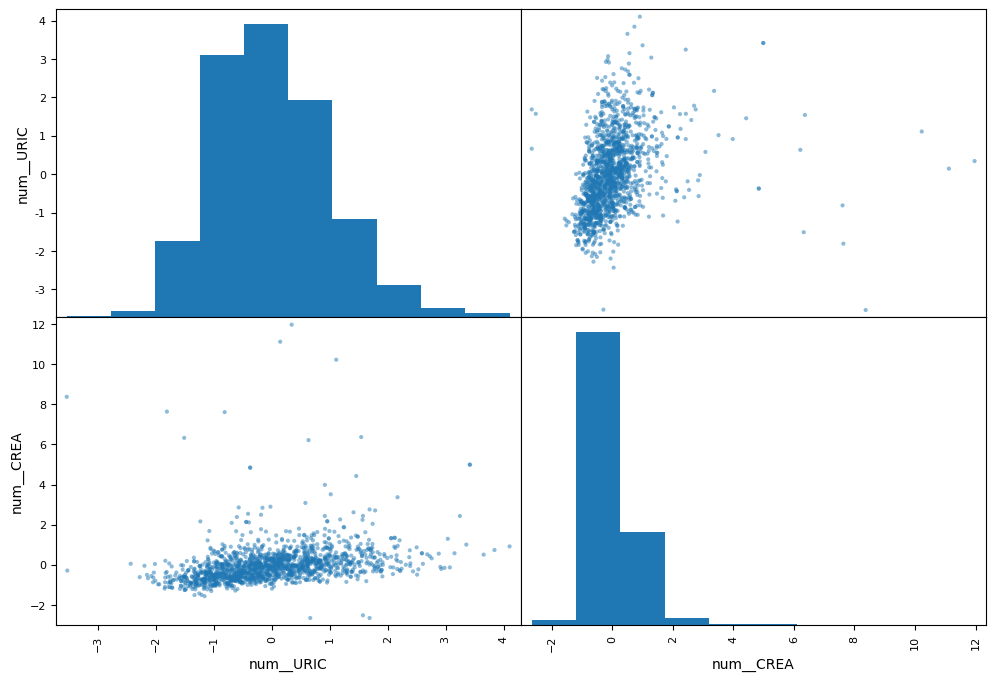

In [22]:
from pandas.plotting import scatter_matrix
#relation between HDL-C and num__BUN
attributes = ["num__URIC", "num__CREA"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

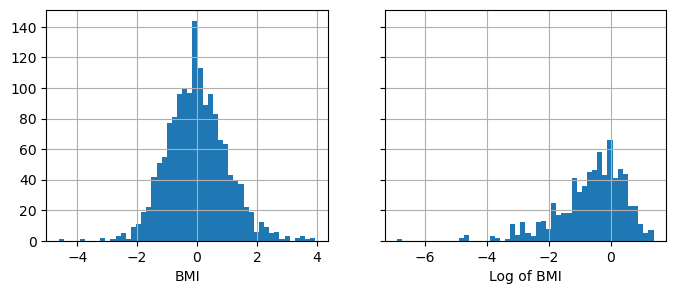

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["num__BMI"].hist(ax=axs[0], bins=50)
data["num__BMI"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("BMI")
axs[1].set_xlabel("Log of BMI")
plt.show() 

In [24]:
data["L1.4T_L1.4"]=data["num__L1.4T"]+data["num__L1-4"]
data["FNT_FN"]=data["num__FNT"]+data["num__FN"]
data["TL_TLT"]=data["num__TL"]+data["num__TLT"]
datanew=data.drop("num__L1.4T",axis=1)
datanew=datanew.drop("num__L1-4",axis=1)
datanew=datanew.drop("num__FN",axis=1)
datanew=datanew.drop("num__FNT",axis=1)
datanew=datanew.drop("num__TLT",axis=1)
datanew=datanew.drop("num__TL",axis=1)
data=datanew.copy()
# data[""]

In [25]:
#split data to train and test data:

from sklearn.model_selection import StratifiedShuffleSplit

splitter= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)#n_splits=1
strat_splits = []
for train_index, test_index in splitter.split(data, data["cat__HTN"]):
    strat_train_set= data.iloc[train_index]
    strat_test_set= data.iloc[test_index]
    strat_splits.append([strat_train_set, strat_test_set])
strat_train_set

,num__Gender,num__Age,num__Height,num__Weight,num__BMI,num__ALT,num__AST,num__BUN,num__CREA,num__URIC,...,cat__Hyperuricemia,cat__AS,cat__VT,cat__VD,cat__OP,cat__CAD,cat__CKD,L1.4T_L1.4,FNT_FN,TL_TLT
1288,1.263441,0.564029,-0.481059,-0.856069,-0.790442,1.893935,1.093695,0.538346,-0.072769,-0.055851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.126235,2.298965,3.199056
1144,-0.791489,-1.304453,1.269710,0.578068,-0.128495,-0.213685,-0.281493,0.130868,0.176564,1.325376,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.175940,-0.842788,-0.225874
1253,-0.791489,-0.295941,1.394765,0.240624,-0.600032,-0.033032,-0.069926,0.040317,0.936251,-0.814131,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.628040,3.814771,3.284842
365,1.263441,1.244188,-2.106772,-1.193513,-0.133577,0.388492,0.670560,-0.041179,-0.014332,-1.100294,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.749656,-0.385567,-0.651841
360,1.263441,0.071501,0.144216,-1.024791,-1.399927,-0.695427,-1.127763,-0.116638,-0.068873,0.106342,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.203371,0.238891,0.110751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-0.791489,1.893075,0.519381,0.831151,0.711558,0.207839,-0.175710,-0.367162,0.051897,-2.436066,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.662146,-0.663651,0.002148
462,-0.791489,-0.530479,0.894545,0.156263,-0.383152,0.087404,0.141641,-0.216244,-0.119519,0.593956,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.828113,-2.544588,-1.885149
899,1.263441,0.493668,-1.356443,-1.362235,-0.940315,-0.394338,-0.810412,-0.020050,-0.251977,0.323289,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.431393,-0.312235,-0.734073
1174,-0.791489,0.564029,-0.481059,-0.181181,0.139340,-0.033032,-0.069926,0.324043,0.281752,-0.257302,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.223383,-0.401803,0.707995


In [26]:
strat_test_set

,num__Gender,num__Age,num__Height,num__Weight,num__BMI,num__ALT,num__AST,num__BUN,num__CREA,num__URIC,...,cat__Hyperuricemia,cat__AS,cat__VT,cat__VD,cat__OP,cat__CAD,cat__CKD,L1.4T_L1.4,FNT_FN,TL_TLT
1422,-0.791489,-0.194309,1.019600,0.999873,0.543701,-0.755644,-0.175710,0.025225,-0.758436,-1.699481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.885863,-0.905833,-1.648680
271,1.263441,0.368581,0.644435,0.831151,0.616787,-0.454556,-0.069926,1.081651,0.168772,-0.350279,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.937250,-0.846217,-2.116431
928,1.263441,-1.851707,0.144216,-1.024791,-1.399927,-0.033032,-0.175710,-0.502988,-1.214248,-1.480468,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.781657,1.747353,0.823860
667,-0.791489,0.173134,1.144655,1.252956,0.751793,-0.695427,-0.493061,-0.376217,-1.140227,-1.720142,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.829033,-2.101502,-1.305535
64,-0.791489,0.329492,-0.105894,0.240624,0.427303,0.388492,0.141641,0.281786,-0.283144,0.992725,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.968332,-1.519097,-2.509802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1.263441,1.424000,-2.231827,-1.109152,0.104405,0.147622,0.247425,1.353303,0.258377,1.274755,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-2.752661,-1.562764,-0.588577
857,1.263441,-0.522661,-1.106333,-1.446596,-1.227971,-0.394338,-0.175710,-0.276611,-0.625977,-0.519704,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.316922,0.234555,0.312402
1360,1.263441,-1.132458,-0.481059,-1.193513,-1.255333,-0.514773,-0.281493,0.453832,-0.516894,-1.024880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268783,2.467329,2.429259
1213,-0.791489,-0.053586,0.769490,0.240624,-0.198045,-0.213685,0.458993,-0.367162,-0.738956,-1.509394,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.471820,-0.385567,0.262471


In [27]:
data = strat_train_set.drop("cat__HTN", axis=1)#train data
data_labels = strat_train_set["cat__HTN"].copy()#train label

data_test = strat_test_set.drop("cat__HTN", axis=1)#test data
data_labelstest = strat_test_set["cat__HTN"].copy()#test label

In [28]:
data_labelstest

1422    0.0
271     1.0
928     0.0
667     0.0
64      1.0
       ... 
130     1.0
857     1.0
1360    0.0
1213    0.0
1351    0.0
Name: cat__HTN, Length: 308, dtype: float64

In [29]:
data_test.shape

(308, 36)

# Select and Train a Model  


In [30]:
#cross_val_predict: #The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set
from sklearn.model_selection import cross_val_predict

#Compute confusion matrix to evaluate the accuracy of a classification.
#model precision score measures the proportion of positively predicted labels that are actually correct, Precision Score = TP / (FP + TP) ( positive predictive value)
#recall_score :the model’s ability to correctly predict the positives out of actual positives. Recall Score = TP / (FN + TP)
#accuracy score :In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
#f1_score : F1 score reaches its best value at 1 and worst score at 0. F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import confusion_matrix , precision_score, recall_score  ,accuracy_score ,f1_score, classification_report
from sklearn.metrics import precision_recall_curve


# DecisionTreeClassifier() :  breaking down a dataset into smaller and smaller subsets based on different criteria.
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression  : outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.
#The SGDClassifier applies regularized linear model with SGD learning to build an estimator.
from sklearn.linear_model import SGDClassifier, LogisticRegression

#A random forest : is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.ensemble import RandomForestClassifier

##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
#precision recall tradeoff , function to plot presicion and recall and thresholds 
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(visible=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

# RandomForestClassifier with different values for each parameter

In [31]:
#RandomForestClassifier() : fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
#random foreign  employs averaging to increase predicted accuracy and reduce overfitting
#here one denotes that loan approved and zero means loan will not approve so accuracy is quite less

RF_clf2=RandomForestClassifier(n_estimators=1,min_samples_split=20,max_depth=7,max_features=1)
RF_clf2.fit(data, data_labels)
y_pred=RF_clf2.predict(data_test)
 
    
y_train_pred = cross_val_predict(RF_clf2, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision=precision_score(data_labels,y_train_pred)

# Recall Score = TP / (FN + TP)
RF_clf_recall=recall_score(data_labels,y_train_pred)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1=f1_score(data_labels,y_train_pred)

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)

# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(RF_clf2, data, data_labels, cv=3)
precisions, recalls, thresholds = precision_recall_curve(data_labels, RF_clf_y_scores)
sc = cross_val_score(RF_clf2, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.597233523189585

y_pred         :
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
confusion matrix:
 [[290 266]
 [229 444]]
RF

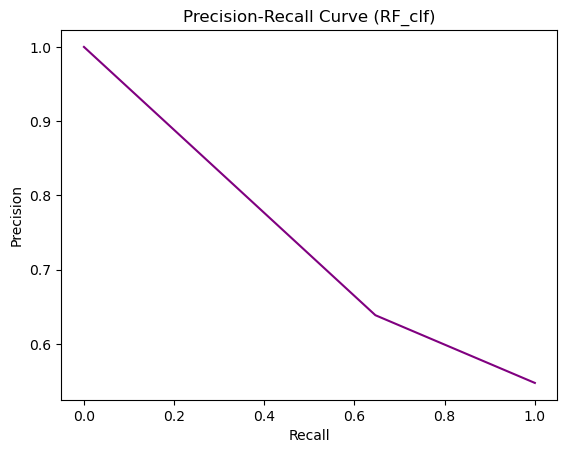

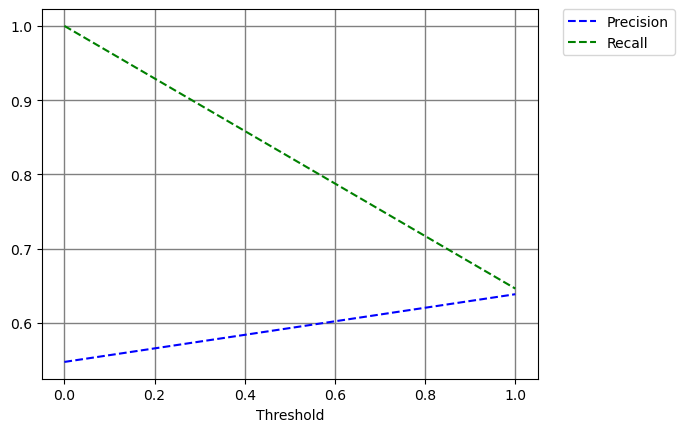

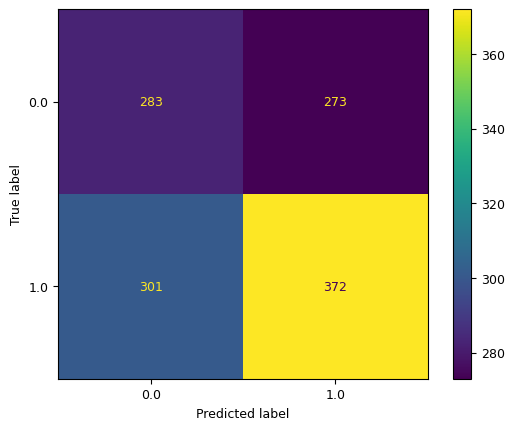

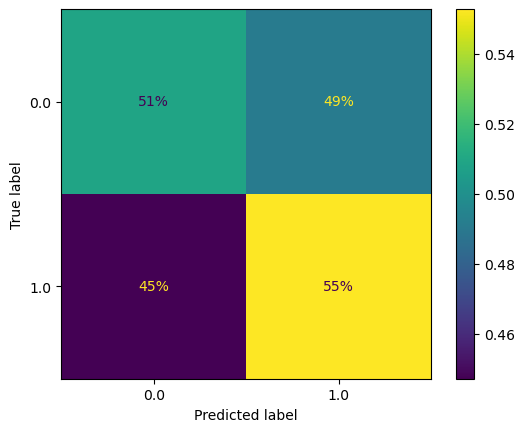

In [32]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)

 

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (RF_clf)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
#display plot
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(RF_clf2, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [33]:
RF_clf=RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
RF_clf.fit(data, data_labels)
y_pred=RF_clf.predict(data_test)
 
    
y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision=precision_score(data_labels,y_train_pred)

# Recall Score = TP / (FN + TP)
RF_clf_recall=recall_score(data_labels,y_train_pred)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1=f1_score(data_labels,y_train_pred)

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)

# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(RF_clf, data, data_labels, cv=3)
precisions, recalls, thresholds = precision_recall_curve(data_labels, RF_clf_y_scores)
sc = cross_val_score(RF_clf, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.6956875508543532

y_pred         :
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
confusion matrix:
 [[293 263]
 [111 562]]
RF

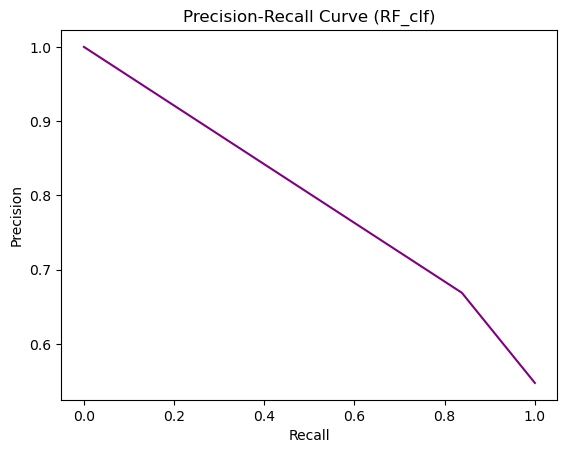

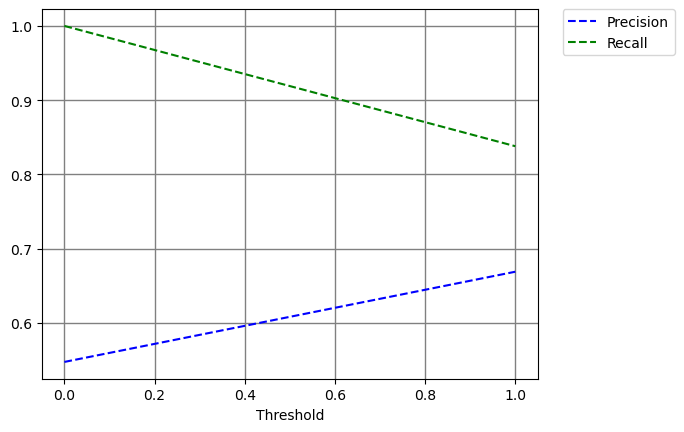

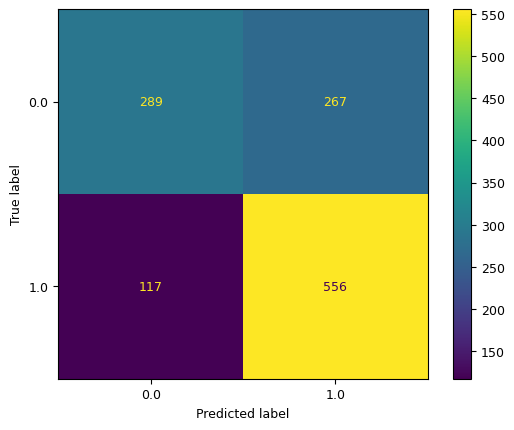

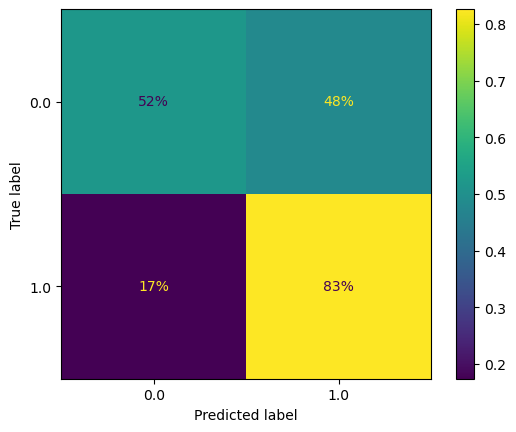

In [34]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)

 

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (RF_clf)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
#display plot
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

# SGDClassifier

In [35]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(data, data_labels)
y_pred=sgd_clf.predict(data_test)
y_train_pred_sgd= cross_val_predict(sgd_clf, data, data_labels, cv=3)

##CONFUSION MATRIX : #CONFUSION MATRIX : to summarizes the performance of a classification model or algorithm:first row is the negative class , seconed row for positive class 
cm=confusion_matrix(data_labels,y_train_pred_sgd)
cm

#Precision Score = TP / (FP + TP) ( positive predictive value)
sgd_precision=precision_score(data_labels,y_train_pred_sgd)
sgd_precision

# Recall Score = TP / (FN + TP)
sgd_recall=recall_score(data_labels,y_train_pred_sgd)
sgd_recall

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
sgd_f1=f1_score(data_labels,y_train_pred_sgd)
sgd_f1

#accuracy score :
sgd_accuracy=accuracy_score(data_labels,y_train_pred_sgd)
sgd_accuracy

#the function cross_val_predict() return decision scores instead of prediction :
sgd_y_scores = cross_val_predict(sgd_clf, data, data_labels, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(data_labels, sgd_y_scores)
sc = cross_val_score(sgd_clf, data, data_labels, cv=3,scoring="accuracy")

sgd_accuracy

0.6354759967453214

y_pred          :
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
confusion matrix :
 [[337 219]
 [229 444]]


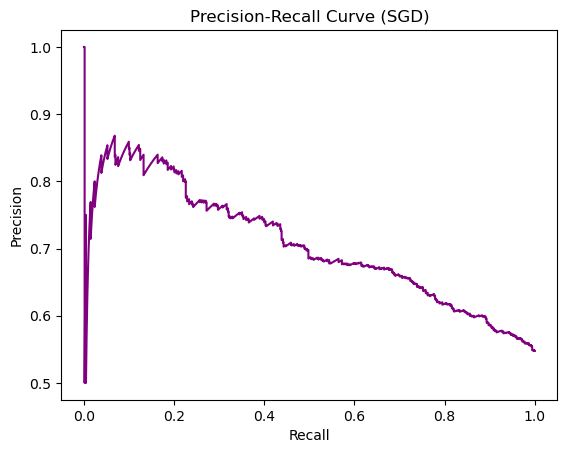

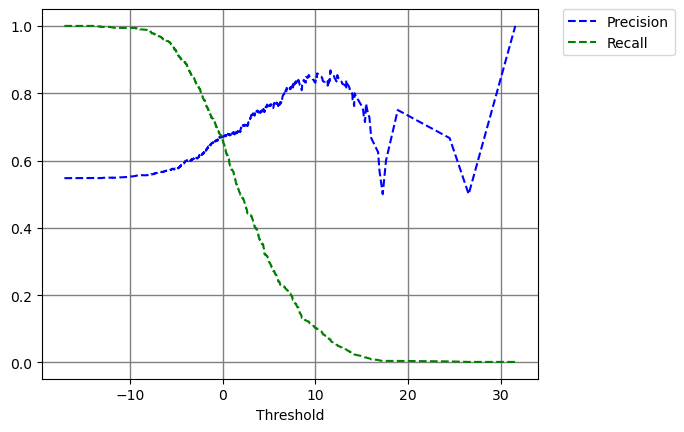

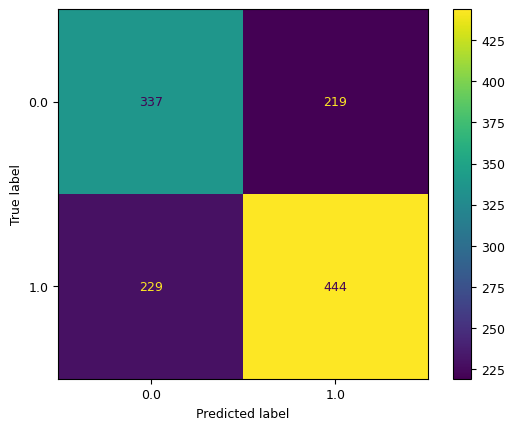

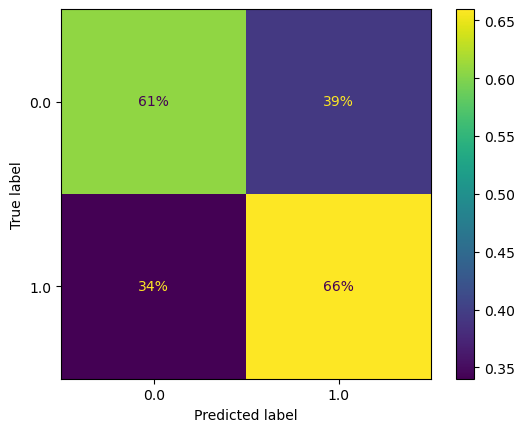

In [36]:
print ("y_pred          :\n",y_pred)
print("confusion matrix :\n",cm)
print("sgd_precision    : ",sgd_precision)
print("sgd_recall       : ",sgd_recall)
print("sgd_f1           : " ,sgd_f1)
print("sgd_accuracy     : ",sgd_accuracy)
print("y_scores         :\n" ,sgd_y_scores)
print("sc               :" ,sc)



fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (SGD)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()


# KNeighborsClassifier with different values for each parameter


In [37]:
#Nearest Neighbors Classification :##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
kn_clf=KNeighborsClassifier(n_neighbors=3,weights='distance')
kn_clf.fit(data, data_labels)
#calculating accuracy
y_pred=kn_clf.predict(data_test)
y_train_pred = cross_val_predict(kn_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
kn_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
kn_clf_precision=precision_score(data_labels,y_train_pred)

# Recall Score = TP / (FN + TP)
kn_clf_recall=recall_score(data_labels,y_train_pred)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
kn_clf_f1=f1_score(data_labels,y_train_pred)

#accuracy score :
kn_clf_accuracy=accuracy_score(data_labels,y_train_pred)

#the function cross_val_predict() return decision scores instead of prediction :
kn_clf_y_scores = cross_val_predict(kn_clf, data, data_labels, cv=3)
precisions, recalls, thresholds = precision_recall_curve(data_labels, kn_clf_y_scores)
sc = cross_val_score(kn_clf, data, data_labels, cv=3,scoring="accuracy")
kn_clf_accuracy

0.6159479251423922

y_pred         :
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
confusion matrix:
 [[332 224]
 [248 425]]
kn

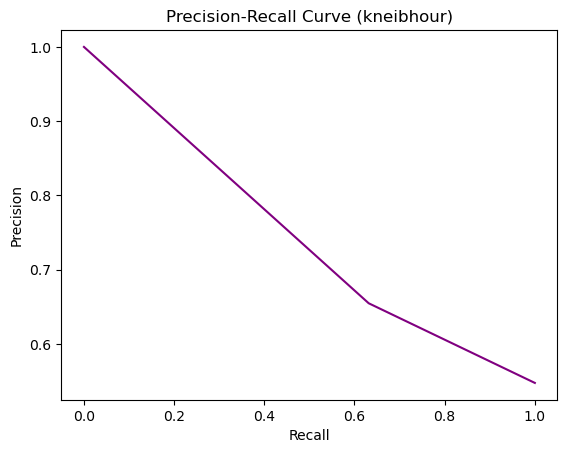

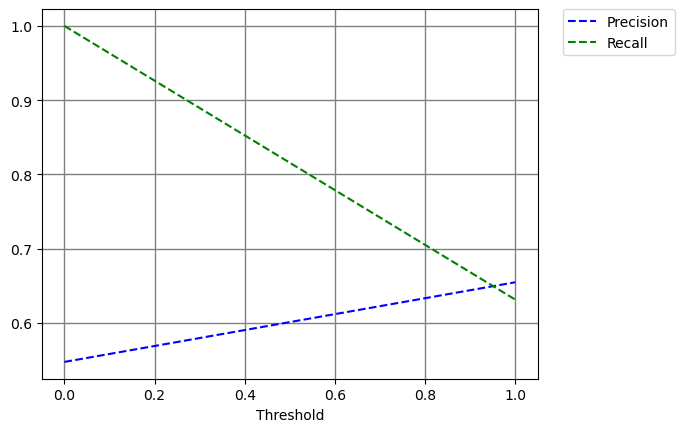

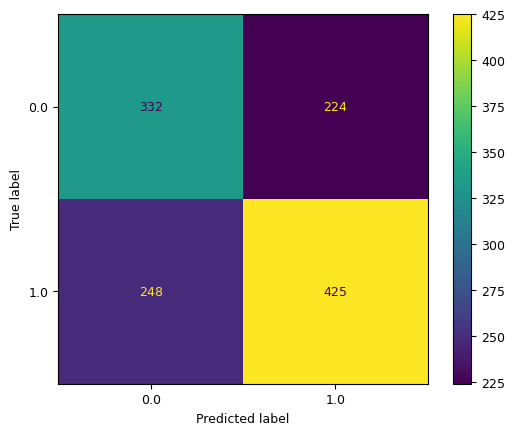

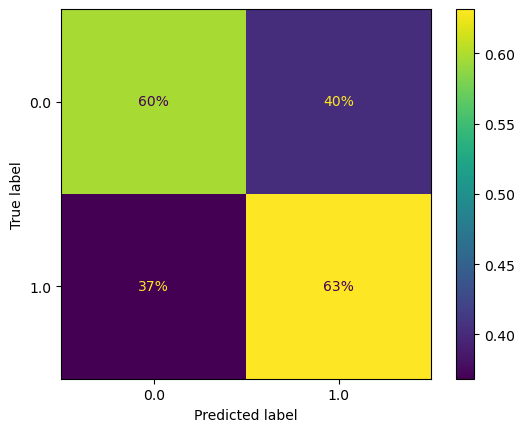

In [38]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",kn_clf_cm)
print("kn_clf_precision    : ",kn_clf_precision)
print("kn_clf_recall       : ",kn_clf_recall)
print("kn_clf_f1           : " ,kn_clf_f1)
print("kn_clf_y_scores         :\n" ,kn_clf_y_scores)
print("sc               :" ,sc)

 

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (kneibhour)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

 

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

 

 

 

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(kn_clf, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

 

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [39]:
kn_clf=KNeighborsClassifier(n_neighbors=20,weights='uniform')
kn_clf.fit(data, data_labels)
#calculating accuracy
y_pred=kn_clf.predict(data_test)
y_train_pred = cross_val_predict(kn_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
kn_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
kn_clf_precision=precision_score(data_labels,y_train_pred)

# Recall Score = TP / (FN + TP)
kn_clf_recall=recall_score(data_labels,y_train_pred)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
kn_clf_f1=f1_score(data_labels,y_train_pred)

#accuracy score :
kn_clf_accuracy=accuracy_score(data_labels,y_train_pred)

#the function cross_val_predict() return decision scores instead of prediction :
kn_clf_y_scores = cross_val_predict(kn_clf, data, data_labels, cv=3)
precisions, recalls, thresholds = precision_recall_curve(data_labels, kn_clf_y_scores)
sc = cross_val_score(kn_clf, data, data_labels, cv=3,scoring="accuracy")
kn_clf_accuracy

0.6143205858421481

y_pred         :
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
confusion matrix:
 [[369 187]
 [287 386]]
kn

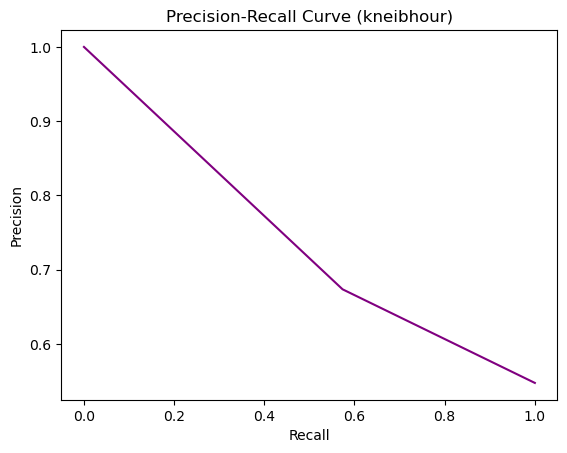

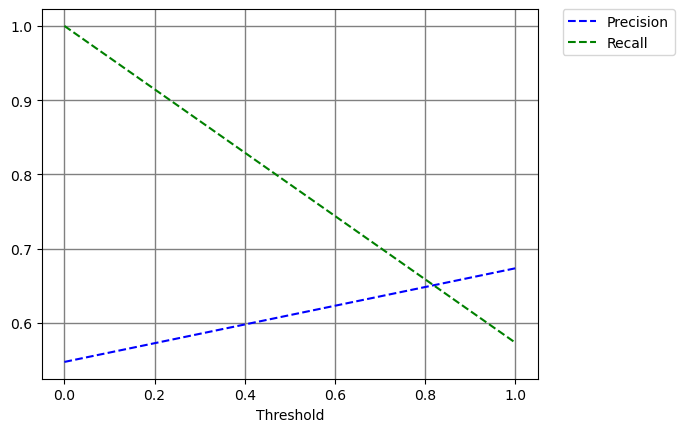

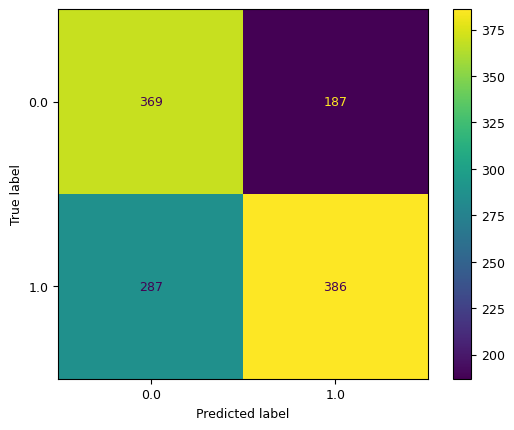

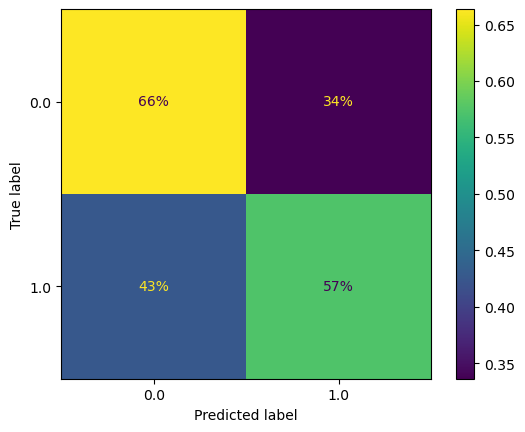

In [40]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",kn_clf_cm)
print("kn_clf_precision    : ",kn_clf_precision)
print("kn_clf_recall       : ",kn_clf_recall)
print("kn_clf_f1           : " ,kn_clf_f1)
print("kn_clf_y_scores         :\n" ,kn_clf_y_scores)
print("sc               :" ,sc)

 

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (kneibhour)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

 

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

 

 

 

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(kn_clf, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

 

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

# GaussianNB

In [41]:
#GaussianNB() :to find the probabilistic approach and Gaussian distribution. 
from sklearn.naive_bayes import GaussianNB
gu_clf=GaussianNB()
gu_clf.fit(data, data_labels)

y_pred=gu_clf.predict(data_test)
gu_clf_y_scores = cross_val_predict(gu_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
gu_clf_cm=confusion_matrix(data_labels,gu_clf_y_scores)


#Precision Score = TP / (FP + TP) ( positive predictive value)
gu_clf_precision=precision_score(data_labels,gu_clf_y_scores)

# Recall Score = TP / (FN + TP)
gu_clf_recall=recall_score(data_labels,gu_clf_y_scores)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
gu_clf_f1=f1_score(data_labels,gu_clf_y_scores)

#accuracy score :
gu_clf_accuracy=accuracy_score(data_labels,gu_clf_y_scores)


#the function cross_val_predict() return decision scores instead of prediction :

precisions, recalls, thresholds = precision_recall_curve(data_labels, gu_clf_y_scores)
sc = cross_val_score(gu_clf, data, data_labels, cv=3,scoring="accuracy")
gu_clf_accuracy

0.645240032546786

y_pred         :
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
confusion matrix:
 [[436 120]
 [316 357]]
gu

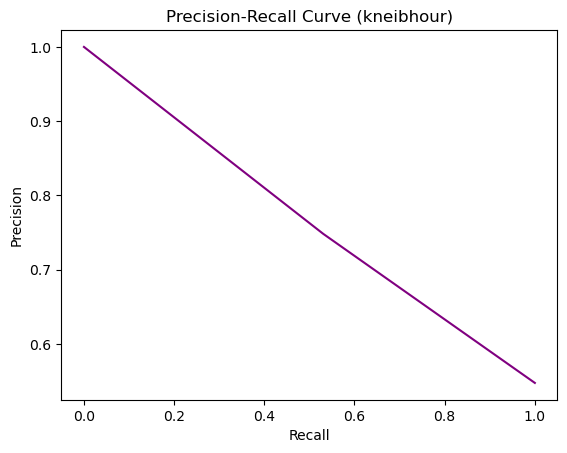

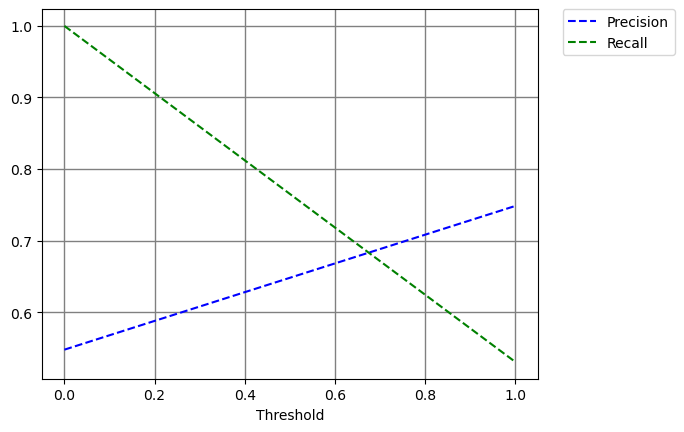

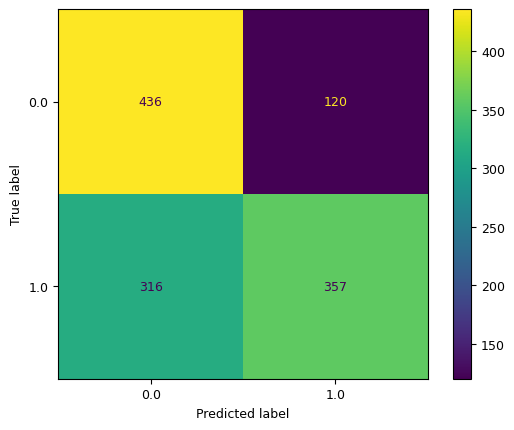

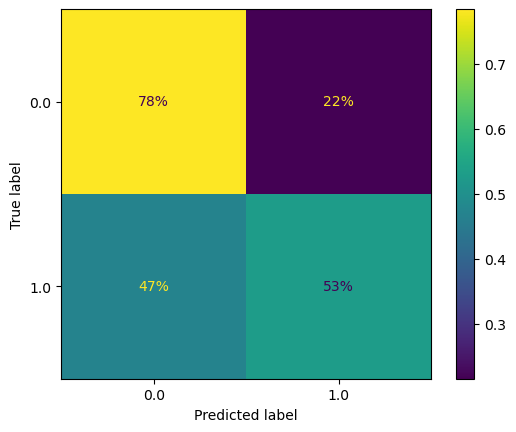

In [42]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",gu_clf_cm)
print("gu_clf_precision    : ",gu_clf_precision)
print("gu_clf_recall       : ",gu_clf_recall)
print("gu_clf_f1           : " ,gu_clf_f1)
print("gu_clf_accuracy     : ",gu_clf_accuracy)
print("gu_clf_y_scores         :\n" ,gu_clf_y_scores)
print("sc               :" ,sc)

 

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (kneibhour)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()

 

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

 

 

 

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(gu_clf, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

 

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [43]:
#LogisticRegression() :utputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.
lo_m=LogisticRegression()
lo_m.fit(data, data_labels)
y_pred=lo_m.predict(data_test)

y_train_pred_lo= cross_val_predict(lo_m, data, data_labels, cv=3)

##CONFUSION MATRIX : #CONFUSION MATRIX : to summarizes the performance of a classification
lo_cm=confusion_matrix(data_labels,y_train_pred_lo)

#Precision Score = TP / (FP + TP) ( positive predictive value)
lo_precision=precision_score(data_labels,y_train_pred_lo)

# Recall Score = TP / (FN + TP)
lo_recall=recall_score(data_labels,y_train_pred_lo)

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
lo_f1=f1_score(data_labels,y_train_pred_lo)

#accuracy score :
lo_accuracy=accuracy_score(data_labels,y_train_pred_lo)

#the function cross_val_predict() return decision scores instead of prediction :
lo_y_scores = cross_val_predict(lo_m, data, data_labels, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(data_labels, lo_y_scores)
sc = cross_val_score(lo_m, data, data_labels, cv=3,scoring="accuracy")

lo_accuracy

0.7030105777054516

y_pred         :
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
confusion matrix:
 [[362 194]
 [171 502]]
lo

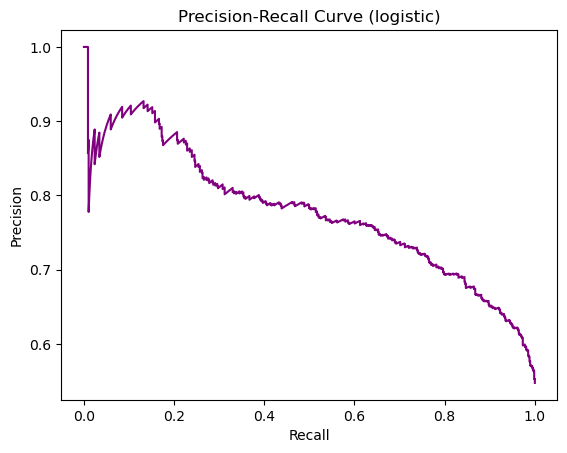

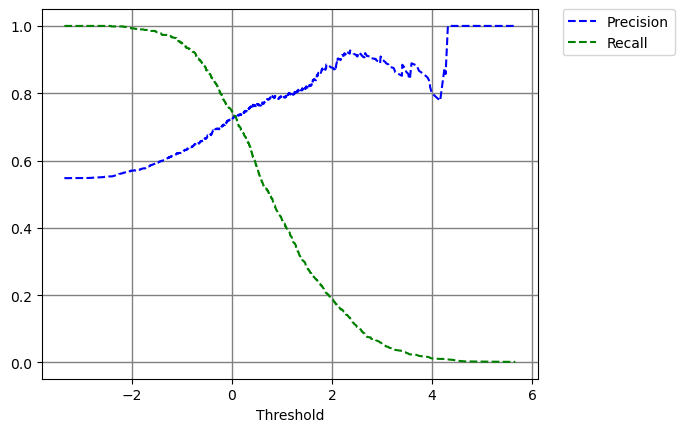

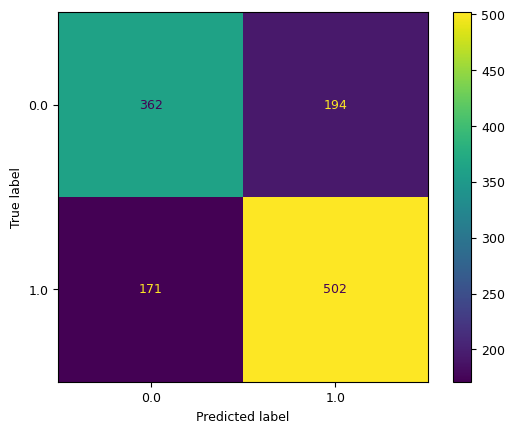

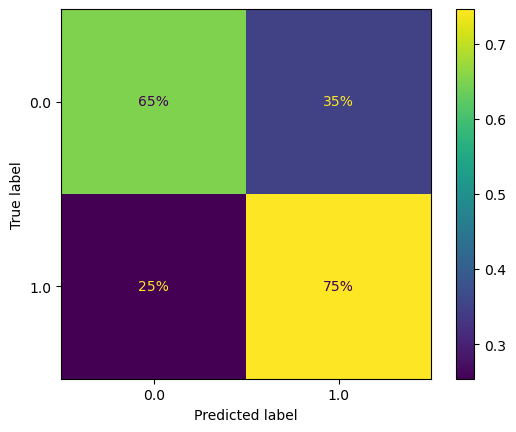

In [44]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",lo_cm)
print("lo_precision    : ",lo_precision)
print("lo_recall       : ",lo_recall)
print("lo_f1           : " ,lo_f1)
print("lo_accuracy     : ",lo_accuracy)
print("y_scores         :\n" ,lo_y_scores)
print("sc               :" ,sc)

fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve (logistic)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()


plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

 
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(lo_m, data, data_labels, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

# Grid Search


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris


param_grid = {
    'var_smoothing': [1e-20,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5 ]
}

gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid, cv=3)
grid_search.fit(data, data_labels)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'var_smoothing': 1e-20}
Best Score:  0.6452481761981433


In [46]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9 , 20],  # You can add more values to test
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 6]  # L1 and L2 distances
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(data, data_labels)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Best Score:  0.6729118964659033


In [47]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-4, 4, 9),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solvers for optimization problem
}

# Create a LogisticRegression instance
logreg = LogisticRegression(max_iter=10000)

# Set up the GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)

# Perform grid search on your training data
grid_search.fit(data, data_labels)

# Print the best parameters and the corresponding best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.710330180852829


# Neaural Network

In [48]:
!pip install tensorflow
from packaging import version
import tensorflow as tf
import sklearn
from tensorflow import keras
assert version.parse(tf.__version__) >= version.parse("2.8.0")
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


In [49]:
data_test.shape

(308, 36)

In [50]:
# Prepare the data train (1075), val (154), test (308)
data_valid=data[:154]
data_train=data[154:]
data_valid_labels=data_labels[:154]
data_train_labels=data_labels[154:]

In [51]:
#Build  the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu",input_shape=data_train.shape[1:]),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [52]:
#take summary about the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                740       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 931
Trainable params: 891
Non-trainable params: 40
_________________________________________________________________


In [53]:
model.layers

In [54]:
#compile the model 
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),metrics=tf.keras.metrics.BinaryAccuracy())

In [55]:
#use callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_project.h5", save_best_only=True)

In [56]:
#use earlystopping 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [57]:
#train the model  using callbacks and earlystopping 
history = model.fit(data_train, data_train_labels, epochs=100,validation_data=(data_valid, data_valid_labels),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 0.7024 - binary_accuracy: 0.6074 - val_loss: 0.5968 - val_binary_accuracy: 0.6818
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5761 - binary_accuracy: 0.6744 - val_loss: 0.5781 - val_binary_accuracy: 0.7143
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5261 - binary_accuracy: 0.7265 - val_loss: 0.5785 - val_binary_accuracy: 0.7078
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5159 - binary_accuracy: 0.7209 - val_loss: 0.5650 - val_binary_accuracy: 0.6818
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4930 - binary_accuracy: 0.7628 - val_loss: 0.5758 - val_binary_accuracy: 0.7273
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4777 - binary_accuracy: 0.7609 - val_loss: 0.5609 - val_binary_accuracy: 0.7078
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - lo

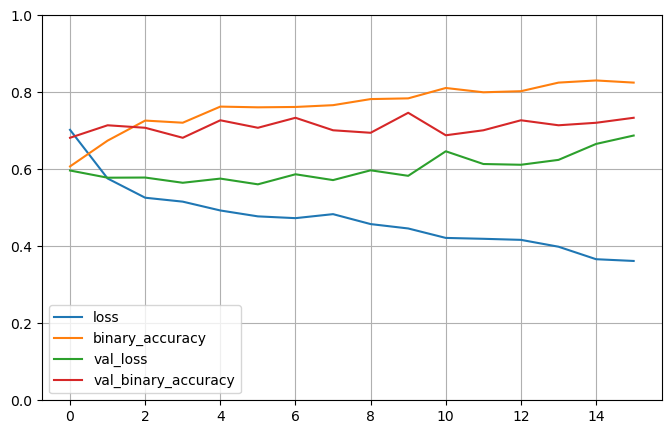

In [58]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
#evaluate the model and use it 
test_loss, test_acc =model.evaluate(data_train, data_train_labels)

34/34 [==============================] - 0s 1ms/step - loss: 0.4469 - binary_accuracy: 0.7898


In [60]:
test_loss, test_acc =model.evaluate(data_test, data_labelstest)

10/10 [==============================] - 0s 2ms/step - loss: 0.6266 - binary_accuracy: 0.6688


In [61]:
data_new =data_test[:3]
y_proba = model.predict(data_new)
y_proba.round(2)
model.predict(data_new)

1/1 [==============================] - 0s 33ms/step


array([[5.8565743e-04],
       [6.7237854e-01],
       [1.4328665e-01]], dtype=float32)

In [62]:
data_labelstest[:3]

1422    0.0
271     1.0
928     0.0
Name: cat__HTN, dtype: float64

# keras_tuner

In [63]:
!pip install keras-tuner --upgrade

In [64]:
#fine tunning to select the best model 
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=4, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=5)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10, activation="relu",input_shape=data_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=tf.keras.metrics.BinaryAccuracy())
    return model

In [65]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_binary_accuracy", max_trials=10, overwrite=True,
    directory="my_project", project_name="my_rnd_search", seed=42)
random_search_tuner.search(data_train, data_train_labels, epochs=20,
                           validation_data=(data_valid, data_valid_labels))

Trial 10 Complete [00h 00m 04s]
val_binary_accuracy: 0.5714285969734192

Best val_binary_accuracy So Far: 0.7402597665786743
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit


In [66]:
top3_models = random_search_tuner.get_best_models()
best_model = top3_models[0]

In [67]:
top3_params = random_search_tuner.get_best_hyperparameters()
top3_params[0].values  # best hyperparameter values

{'n_hidden': 2,
 'n_neurons': 2,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [68]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 02 summary
Hyperparameters:
n_hidden: 2
n_neurons: 2
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.7402597665786743


In [69]:
best_trial.metrics.get_last_value("val_binary_accuracy")

0.7402597665786743

In [70]:
best_model.fit(data_train, data_train_labels, epochs=100,
validation_data=(data_valid, data_valid_labels),callbacks=[checkpoint_cb, early_stopping_cb],)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.4344 - binary_accuracy: 0.8084 - val_loss: 0.6238 - val_binary_accuracy: 0.7078
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4336 - binary_accuracy: 0.8047 - val_loss: 0.6312 - val_binary_accuracy: 0.7403
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4292 - binary_accuracy: 0.8149 - val_loss: 0.6281 - val_binary_accuracy: 0.7273
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4214 - binary_accuracy: 0.8112 - val_loss: 0.6405 - val_binary_accuracy: 0.7078
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4119 - binary_accuracy: 0.8260 - val_loss: 0.6783 - val_binary_accuracy: 0.7273
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4199 - binary_accuracy: 0.8121 - val_loss: 0.6737 - val_binary_accuracy: 0.6883
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - los

In [71]:
#
test_loss, test_accuracy = best_model.evaluate(data_test, data_labelstest)

10/10 [==============================] - 0s 1ms/step - loss: 0.6780 - binary_accuracy: 0.6591
